<h1>Performing Linear Regression on Boston Housing Data.</h1>

<h2>1. Loading and Formatting Data</h2>

In [290]:
%matplotlib inline
import warnings
from sklearn.datasets import load_boston

warnings.filterwarnings("ignore")

boston = load_boston()
print(boston.data.shape)

(506, 13)


In [291]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [292]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split data into train and test to avoid data leakage.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Normalize the data.
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Set y values.
y = boston.target
y = np.reshape(y, (-1, 1))

<h2>2. Custom Implementation of SGD for Linear Regression (No Regularizer)</h2>

In [293]:
#Custom implementation of SGD for linear regression, without a regularizer.
#r: learning rate
#n_iter: # of iterations of linear regression

#Source for second loop: https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array
#Found by Googling "python select random rows from numpy array"
#The batch size is 15 for each iteration.

def run_LR(X, y, r, n_iter):    
    w_loss = 0
    b_loss = 0
    w = np.random.rand(1,13)
    b = np.random.random_sample()
    n = len(y)

    for i in range(0,n_iter):
        sample = np.hstack((X,y))
        sample = sample[np.random.choice(X.shape[0], 15, replace=False), :]
        X_sample, y_sample = sample[:, :-1], sample[:, -1]
        y_sample = np.reshape(y_sample, (-1, 1))
        w = w - r*(1/n * np.dot((-2 * X_sample.T),(y_sample - np.dot(X_sample, w.T) - b))).T
        b = b - r*sum(1/n * ((-2) * (y_sample - np.dot(X_sample, w.T) - b)))
        r = r*.999

    return b, w

In [294]:
#Source: https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy

def find_mse(y_pred, y):
    mse = ((y_pred - y)**2).mean()
    return mse

The mean squared error with the custom implementation is 20.04.


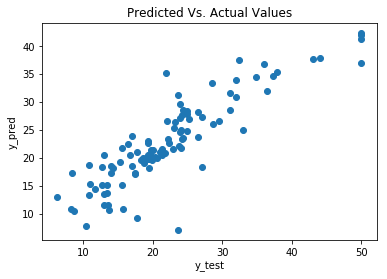

In [295]:
#Custom Implementation of Linear Regression
import matplotlib.pyplot as plt

#b: y-intercept (i.e. W0)
#w: array of weights (i.e. W1 to weight for last feature)
#Train the model with the training dataset.
b, w = run_LR(X_train, y_train, 1, 4000)
#Test the model with the test dataset.
y_pred = np.dot(X_test, w.T) + b
mse = find_mse(y_pred, y_test)
print("The mean squared error with the custom implementation is {0:.2f}.".format(mse))

#Plot graph of predicted values versus actual values.
plt.scatter(y_test, y_pred)
plt.title('Predicted Vs. Actual Values')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<h2>3. Scikit-Learn Implementation of SDG for Linear Regression</h2>

The mean squared error with the SKLearn implementation is 21.13.


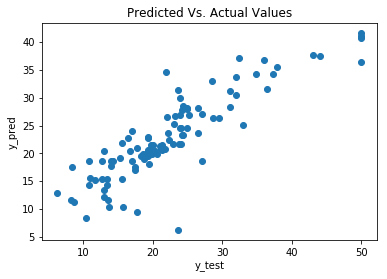

In [296]:
#Use SKLearn's SGDRegressor.
from sklearn import linear_model

clf = linear_model.SGDRegressor(loss = 'squared_loss', max_iter=4000, tol=1e-5)
clf.fit(X_train, y_train)
y_pred_skl = clf.predict(X_test)
y_pred_skl = np.reshape(y_pred_skl, (-1, 1))
mse_skl = float(find_mse(y_pred_skl, y_test))
print("The mean squared error with the SKLearn implementation is {0:.2f}.".format(mse_skl))

plt.scatter(y_test, y_pred_skl)
plt.title('Predicted Vs. Actual Values')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<h2>4. Comparison of Custom vs. Scikit-Learn Implementations</h2>

<h3>4.1 Graphical Comparison</h3>

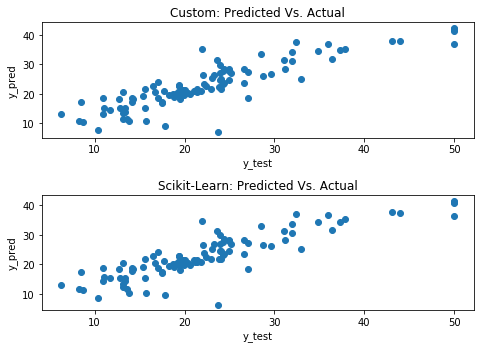

In [297]:
plt.subplots_adjust(left=3, bottom=5, right=4, top=6, wspace=None, hspace=.5)

plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.title('Custom: Predicted Vs. Actual')
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred_skl)
plt.title('Scikit-Learn: Predicted Vs. Actual')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

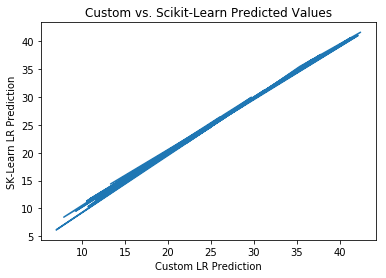

In [298]:
plt.plot(y_pred, y_pred_skl)
plt.title('Custom vs. Scikit-Learn Predicted Values')
plt.xlabel('Custom LR Prediction')
plt.ylabel('SK-Learn LR Prediction')
plt.show()

<h3>4.2 Tabular Comparison</h3>

In [299]:
from prettytable import PrettyTable
np.set_printoptions(precision=2, suppress=True)    

x = PrettyTable()
x.padding_width = (0)

x.field_names = ["Model", "Mean Squared Error", "W0", "W1", "W2", "W3", "W4", "W5", "W6", "W7", "W8", "W9", "W10", "W11","W12", "W13"]

x.add_row(["Custom Linear Reg.", "{0:.2f}".format(mse), b, "{0:.2f}".format(w[0,0]), "{0:.2f}".format(w[0,1]),\
           "{0:.2f}".format(w[0,2]), "{0:.2f}".format(w[0,3]), "{0:.2f}".format(w[0,4]), "{0:.2f}".format(w[0,5]),\
           "{0:.2f}".format(w[0,6]), "{0:.2f}".format(w[0,7]),"{0:.2f}".format(w[0,8]), "{0:.2f}".format(w[0,9]),\
           "{0:.2f}".format(w[0,10]), "{0:.2f}".format(w[0,11]), "{0:.2f}".format(w[0,12])])
x.add_row(["Sk-Learn Linear Reg.", "{0:.2f}".format(mse_skl), clf.intercept_, "{0:.2f}".format(clf.coef_[0]),\
           "{0:.2f}".format(clf.coef_[1]), "{0:.2f}".format(clf.coef_[2]), "{0:.2f}".format(clf.coef_[3]), "{0:.2f}".format(clf.coef_[4]),\
           "{0:.2f}".format(clf.coef_[5]), "{0:.2f}".format(clf.coef_[6]), "{0:.2f}".format(clf.coef_[7]), "{0:.2f}".format(clf.coef_[8]),\
           "{0:.2f}".format(clf.coef_[9]), "{0:.2f}".format(clf.coef_[10]), "{0:.2f}".format(clf.coef_[11]), "{0:.2f}".format(clf.coef_[12])])
print(x)

+--------------------+------------------+-------+-----+----+----+----+-----+----+----+-----+----+-----+-----+----+-----+
|       Model        |Mean Squared Error|   W0  |  W1 | W2 | W3 | W4 |  W5 | W6 | W7 |  W8 | W9 | W10 | W11 |W12 | W13 |
+--------------------+------------------+-------+-----+----+----+----+-----+----+----+-----+----+-----+-----+----+-----+
| Custom Linear Reg. |      20.04       |[22.58]|-1.19|0.76|0.17|0.94|-0.90|6.71|0.07|-2.69|1.43|-0.16|-2.10|1.43|-3.22|
|Sk-Learn Linear Reg.|      21.13       |[22.56]|-1.10|0.69|0.07|0.92|-0.74|6.13|0.14|-2.52|1.30|-0.96|-2.15|0.72|-3.37|
+--------------------+------------------+-------+-----+----+----+----+-----+----+----+-----+----+-----+-----+----+-----+


<h2>5. Summary</h2>

Both the custom and scikit-learn linear regression models achieve similar mean squared error (MSE). With a relatively low MSE, these models would work well to predict housing values in Boston, with them performing about equally well.